In [10]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
def f(x):
    return 3 * x ** 2 - 4 * x

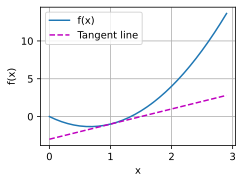

In [11]:
x = np.arange(0, 3, 0.1)
d2l.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend = ['f(x)', 'Tangent line'])

# 矩阵微积分：Ax 对 x 的导数

## 1. 问题定义

考虑线性变换：
$$
y = Ax
$$

其中：
- $A \in \mathbb{R}^{m \times n}$ 是常数矩阵
- $x \in \mathbb{R}^{n \times 1}$ 是列向量  
- $y \in \mathbb{R}^{m \times 1}$ 是列向量

**关键问题**：$\frac{\partial y}{\partial x} = ?$

## 2. 数学推导

### 2.1 标量情况回顾

对于标量函数：
$$
f(x) = a^T x = \sum_{i=1}^n a_i x_i
$$

梯度：
$$
\frac{\partial f}{\partial x} = a \quad (\text{列向量})
$$

### 2.2 向量情况分析

第 $i$ 个输出元素：
$$
y_i = \sum_{j=1}^n A_{ij} x_j
$$

对 $x_j$ 求偏导：
$$
\frac{\partial y_i}{\partial x_j} = A_{ij}
$$

### 2.3 雅可比矩阵

根据定义，雅可比矩阵为：
$$
J_{ij} = \frac{\partial y_i}{\partial x_j} = A_{ij}
$$

因此：
$$
J = \frac{\partial y}{\partial x} = A \in \mathbb{R}^{m \times n}
$$

### 2.4 梯度矩阵（关键区别）

在矩阵微积分中，**梯度矩阵**通常定义为雅可比矩阵的转置：
$$
\nabla_x y = \left( \frac{\partial y}{\partial x} \right)^T = A^T \in \mathbb{R}^{n \times m}
$$

## 3. 为什么是 $A^T$ 而不是 $A$？

### 3.1 雅可比矩阵 vs 梯度矩阵

- **雅可比矩阵** $J = \frac{\partial y}{\partial x} = A$（$m \times n$）
- **梯度矩阵** $\nabla_x y = \left( \frac{\partial y}{\partial x} \right)^T = A^T$（$n \times m$）

**关键点**：在深度学习中，当我们说"梯度"，通常指的是梯度矩阵，而不是雅可比矩阵。

### 3.2 梯度与雅可比的关系

对于向量值函数 $f: \mathbb{R}^n \to \mathbb{R}^m$：

- 雅可比矩阵存储每个输出对每个输入的偏导数
- 梯度矩阵是雅可比矩阵的转置

## 4. 不同布局约定

### 4.1 分子布局（Jacobian Layout）

$$
\text{Jacobian} = \frac{\partial y}{\partial x} = A \quad (m \times n)
$$

### 4.2 分母布局（Gradient Layout）  

$$
\text{Gradient} = \nabla_x y = A^T \quad (n \times m)
$$

### 4.3 深度学习框架约定

PyTorch、TensorFlow 等深度学习框架使用**分母布局**，因此：
$$
\text{梯度} = A^T
$$

## 5. 反向传播中的链式法则

在神经网络中，如果：

- 前向传播：$y = Ax$
- 损失函数 $L$ 对 $y$ 的梯度为 $\frac{\partial L}{\partial y}$（形状：$m \times 1$）

那么根据链式法则：
$$
\frac{\partial L}{\partial x} = \frac{\partial y}{\partial x}^T \cdot \frac{\partial L}{\partial y} = A^T \cdot \frac{\partial L}{\partial y}
$$

**推导**：
$$
\frac{\partial L}{\partial x_j} = \sum_{i=1}^m \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial x_j} = \sum_{i=1}^m \frac{\partial L}{\partial y_i} A_{ij}
$$

矩阵形式：
$$
\frac{\partial L}{\partial x} = A^T \frac{\partial L}{\partial y}
$$

#### `y.backward(v)`

对于向量函数 $f: \mathbb{R}^n \to \mathbb{R}^m$，其导数是一个 $m \times n$ 的雅可比矩阵：

$$
J = \begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_m}{\partial x_1} & \cdots & \frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

当调用 `y.backward(v)` 时，实际上是计算：

$$
\text{gradient} = v^T \cdot J
$$

其中 $v$ 是传入的 `gradient` 参数。

In [12]:
import torch

x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [13]:
x.grad

In [14]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [15]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [18]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [20]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [21]:
x.grad.zero_()
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [25]:
# 分离计算
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])